## Standard Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Ignoring harmless warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [3]:
df = pd.read_csv("./movies_metadata.csv")

In [4]:
df.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


## Data Cleaning

In [5]:
df = df['id title overview vote_average vote_count'.split()]

<AxesSubplot:>

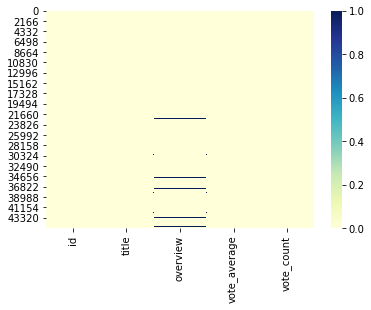

In [6]:
sns.heatmap(df.isnull(),cmap="YlGnBu")

We can see that there are some null values in **overview**<br>Therefore dropping off these rows as they are no use to us

In [7]:
df['overview'] = df['overview'].fillna("")

<AxesSubplot:>

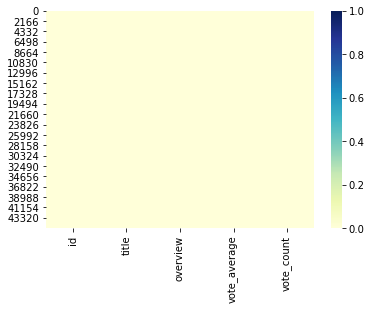

In [8]:
sns.heatmap(df.isnull(),cmap="YlGnBu",vmin=0,vmax = 1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            45466 non-null  object 
 1   title         45460 non-null  object 
 2   overview      45466 non-null  object 
 3   vote_average  45460 non-null  float64
 4   vote_count    45460 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [10]:
df.head()

,id,title,overview,vote_average,vote_count
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",7.7,5415.0
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,6.9,2413.0
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,6.5,92.0
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",6.1,34.0
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,5.7,173.0


## Vectorising the Overview

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
tfidf = TfidfVectorizer(stop_words='english')

In [13]:
tfidf_matrix = tfidf.fit_transform(df['overview'])

In [14]:
tfidf_matrix.shape

(45466, 75827)

Here ,we can see that the dataset has 45466 overviews and 75827 unique words excluding the stop words

In [15]:
from sklearn.metrics.pairwise import linear_kernel

We are multiplyting each element of Tfidf_matrix pairwise to create a 45466X45466 matrix where $$M_{ij}$$ represents the cosine similarity of ith index overview with jth index overview

This means that we will have a symmetric matrix having each diagonal element 1

In [16]:
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)

## Storing Indexes of Movies to find Titles based on Indexes

In [17]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [18]:
indices.head()

title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
dtype: int64

In [19]:
len(indices)

45466

## Defining our Recommendation Function

In [20]:
def get_recommendations(title,cosine_sim = cosine_sim,data = df,indices = indices):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores,key = lambda x : x[1],reverse=True)
    sim_scores = sim_scores[1:11]
    movies_indices = [i[0] for i in sim_scores]
    return (data['title'].iloc[movies_indices])

In [28]:
get_recommendations('Apollo 13')

13599                 Apollo 13: To the Edge and Back
21151                                   Europa Report
9299                                         Stranded
8087                                 Without a Paddle
18444                                       Apollo 18
13513                                  Nigdy w życiu!
20900    The Arrested Development Documentary Project
5156                            First Men in the Moon
20880                              Sergeant Dead Head
3856                                       Red Planet
Name: title, dtype: object

Not quite accurate but close